In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from collections import OrderedDict

In [109]:
# Load the Data
data_dir = 'CG'
# Define a transform to normalize the data
test_transforms = transforms.Compose([transforms.Resize((224,224)),                                       
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                                       
                             ])

# Pass transforms in here, then run the next cell to see how the transforms look
test_data = datasets.DatasetFolder(data_dir + '/test', transform=test_transforms)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16,num_workers=8)

TypeError: __init__() missing 2 required positional arguments: 'loader' and 'extensions'

In [121]:
def find_classes(dir):
    classes = os.listdir(dir)
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

classes ,_ = find_classes(dir=data_dir + '/test')

In [27]:
#Load Model

model = models.densenet121(pretrained=True)
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 10)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

model.classifier = classifier

/opt/rh/rh-python35/root/usr/lib/python3.5/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [28]:
state_dict = torch.load('/datadrive2/amit_cvnd/deep-learning-pytorch/models.first.run/cg_e2_lr_001_loss_1_acc_71_checkpoint.pth')
model.load_state_dict(state_dict)

In [138]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, ( ax1,ax2) = plt.subplots(figsize=(18,27), ncols=2)
    ax1.imshow(img.resize_(1, 224, 224).numpy().squeeze())
    ax1.axis('off')
   
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['brochure',
                            'charts',
                            'fund_manager_no_keypoints',
                            'fund_managers',
                            'junk',
                            'logos',
                            'logos_will',
                            'no_keypoints',
                            'other_logo',
                            'others'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


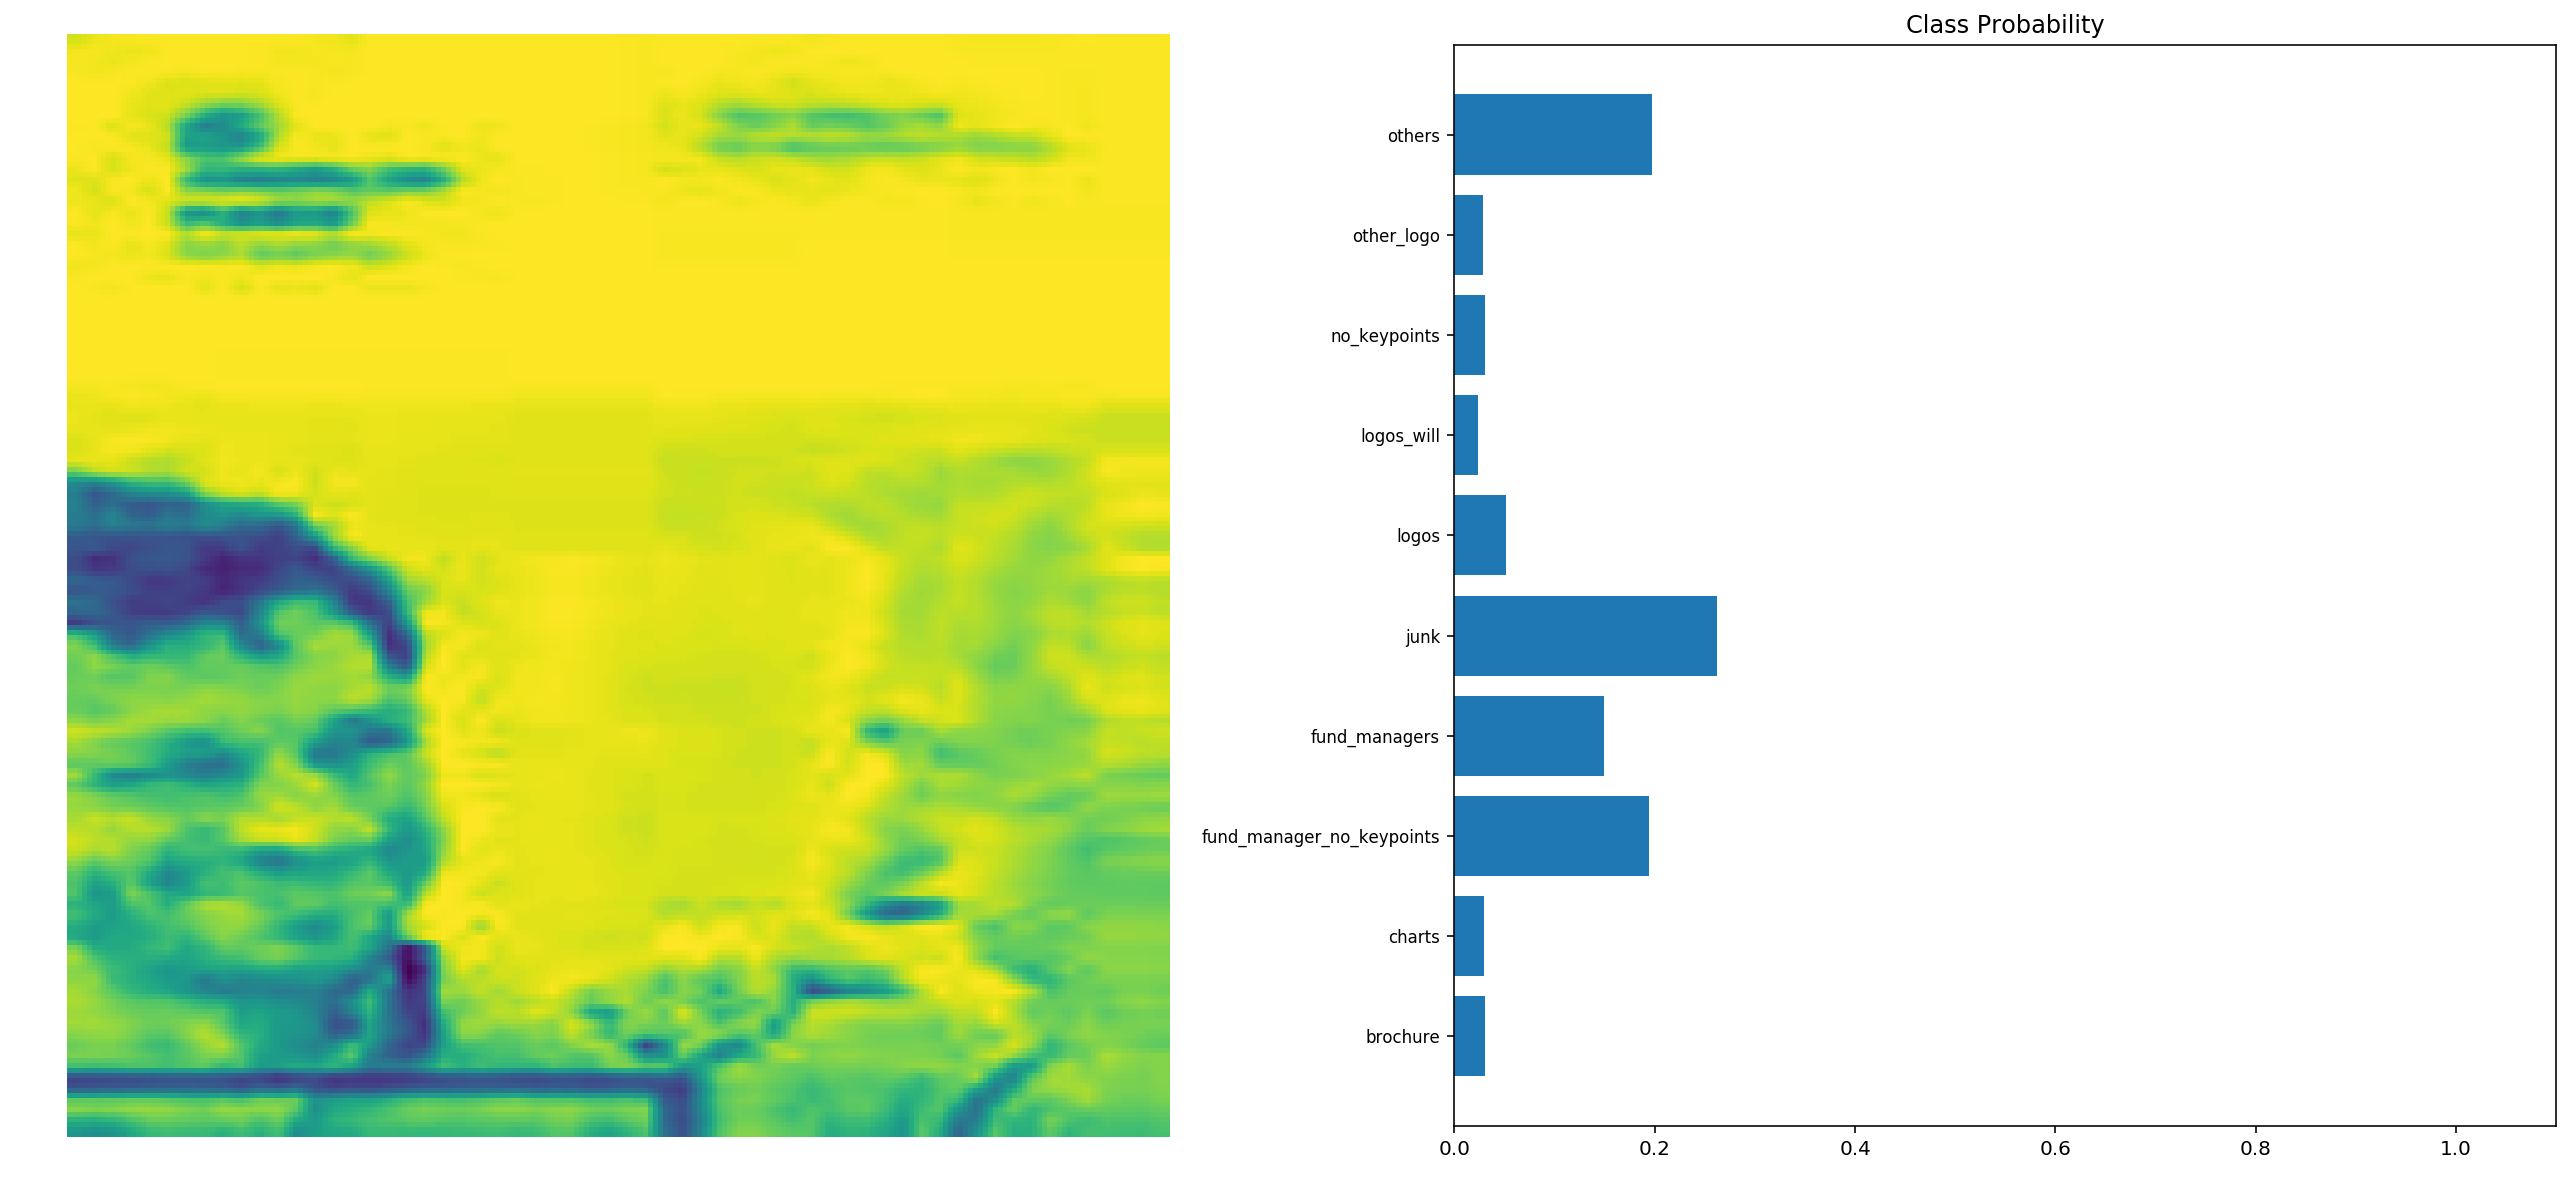

In [139]:
# Test out your network!

model.eval()

dataiter = iter(testloader)
dataiter.next()
images, labels = dataiter.next()
#print(labels)
img = images[3]
img.unsqueeze_(0) 

#print(img)
# Convert 2D image to 1D vector
#img = img.view(1, 150528 )

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
view_classify(img, ps)
#img.numpy()
#ax1.imshow(img)

i = images[3].data
i = i.numpy()
i = np.transpose(i, (1, 2, 0))
#plt.show(i)
#plt.imshow(images[2].unsqueeze_(0).numpy())
plt.imshow(i, interpolation='nearest')
plt.show()


In [128]:
img.size()
images[3].size()

torch.Size([3, 224, 224])

In [129]:
i = images[3].data
i.type()


'torch.FloatTensor'

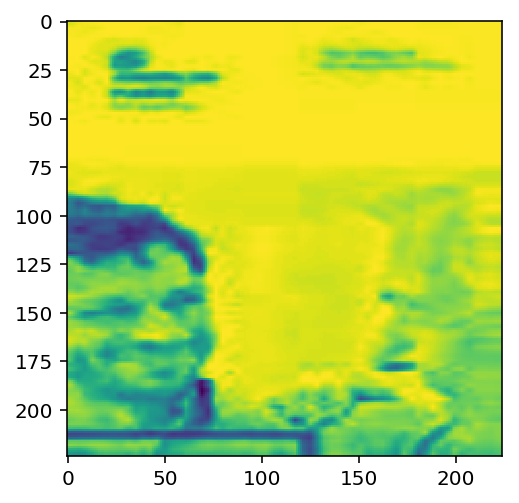

In [130]:
 plt.imshow(i.resize_(1,224, 224).numpy().squeeze())

In [131]:
labels.data

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
         1,  1])

In [132]:
ps.max(dim=1)

(tensor([ 0.2626]), tensor([ 4]))

In [133]:

classes[ps.data.numpy().argmax()]

'junk'

In [103]:
(labels.data == ps.max(dim=1)[0])

RuntimeError: Expected object of type torch.LongTensor but found type torch.FloatTensor for argument #2 'other'

tensor(0)